In [150]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import json

%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 노란색 글씨의 warining 문구 강제 생략
import warnings
warnings.filterwarnings(action='ignore')
    

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


print('numpy version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 크롤링
from bs4                        import BeautifulSoup
from urllib.request             import urlopen , urlretrieve
from urllib.error               import HTTPError
from urllib.error               import URLError

import requests
import re



# ai lib

import sklearn
from   sklearn.datasets          import load_iris , load_breast_cancer

from   sklearn.tree              import DecisionTreeClassifier
from   sklearn.neighbors         import KNeighborsClassifier , KNeighborsRegressor
from   sklearn.linear_model      import LogisticRegression , LinearRegression



from   sklearn.metrics           import accuracy_score , classification_report , mean_absolute_error , mean_squared_error
from   sklearn.model_selection   import train_test_split , GridSearchCV , KFold , StratifiedKFold , cross_val_score , cross_validate
from   sklearn.preprocessing     import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler

numpy version -  1.21.5
pandas version -  1.4.2


- classification(이진분류 , 다중분류) : 정확도 , 정밀도 , 재현율 , F1-Scroe , confusion-matrix(오차 행렬)

In [3]:
multi_classification_frm = pd.read_csv('https://bit.ly/fish_csv_data')
print('type - ' , type(multi_classification_frm))

type -  <class 'pandas.core.frame.DataFrame'>


In [4]:
multi_classification_frm.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
multi_classification_frm['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
# 데이터를 ndarray로 만들자

features = multi_classification_frm.drop('Species' , axis = 1).to_numpy()
target   = multi_classification_frm['Species'].to_numpy()

In [13]:
features[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [10]:
# 레이블 인코딩이 필요하다.

target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [11]:
# digit 변환
# LabelEncoder()

# 회귀 분석 과정에 숫자의 특성이 반영되면 값에 오류가 생긴다. -> 회귀 분석과정에서는 쓰면 안됨


encoder = LabelEncoder()
label_digit = encoder.fit(target).transform(target)
print('label_digit - ' , label_digit)
print('label       - ' , encoder.classes_)


label_digit -  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]
label       -  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
# 1 데이터 분리


print('데이터 분리 - ')
X_train , X_test , y_train , y_test = train_test_split ( features 
                                                       , target
                                                        # 테스트 데이터의 비율 20퍼센트
                                                       , test_size = 0.2
                                                        # 데이터 셔플
                                                       , shuffle   = True
                                                       , random_state = 200)
print('shqpe - ' , X_train.shape , X_test.shape , y_train.shape , y_test.shape)

데이터 분리 - 
shqpe -  (127, 5) (32, 5) (127,) (32,)


In [20]:
# 분류 모델로 최근접 이웃 객체를 생성하고 학습 및 예측

knn = KNeighborsClassifier(n_neighbors = 3)
#  fit을 하면 predict 예측 가능
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)


In [31]:
# 문자열이 리턴되고 있다.
# target은 input데이터가 아니기 때문에 레이블 인코딩을 하지않아도 결과를 볼 수 있다.

print('model  - predict : ' , y_predict[:5])
print('X_test - answer  : ' , y_test[:5])
print('accuracy - ' , accuracy_score(y_test , y_predict))

model  - predict :  ['Smelt' 'Bream' 'Pike' 'Parkki' 'Perch']
X_test - answer  :  ['Smelt' 'Bream' 'Pike' 'Perch' 'Perch']
accuracy -  0.53125


- 전처리로 표준화를 한다면?

In [34]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)
knn.fit(X_train_scaler , y_train)
y_predict_scaler = knn.predict(X_test_scaler)

print('model  - predict : ' , y_predict_scaler[:5])
print('X_test - answer  : ' , y_test[:5])
print('accuracy - ' , accuracy_score(y_test , y_predict_scaler))

model  - predict :  ['Smelt' 'Bream' 'Pike' 'Perch' 'Perch']
X_test - answer  :  ['Smelt' 'Bream' 'Pike' 'Perch' 'Perch']
accuracy -  0.84375


In [27]:
X_train_scaler

array([[ 8.76232783e-01,  6.06856175e-01,  7.74466186e-01,
         1.31449833e+00,  8.90626464e-01],
       [ 1.48568087e+00,  8.53561470e-01,  1.03619852e+00,
         1.87401757e+00,  1.17762766e+00],
       [-7.38804639e-01, -7.25352419e-01, -7.14700535e-01,
        -5.98076356e-01, -4.22093109e-01],
       [ 2.66784699e-01,  2.61468762e-01,  4.49557083e-01,
         1.20589722e+00,  3.51859138e-01],
       [ 5.41036337e-01,  1.54433630e+00,  1.41525914e+00,
        -2.34451388e-01,  5.26083738e-01],
       [-7.23568437e-01, -6.26670301e-01, -6.87624777e-01,
        -7.19323280e-01, -3.65217129e-01],
       [ 1.94276693e+00,  1.64301842e+00,  1.48746116e+00,
         8.54755937e-01,  2.02948720e+00],
       [ 1.80564111e+00,  1.10026677e+00,  1.25280459e+00,
         2.15065047e+00,  1.23468652e+00],
       [-4.95025406e-01, -4.29306065e-01, -3.89791432e-01,
         3.58419436e-01, -3.67594581e-01],
       [-6.77859831e-01, -6.56274937e-01, -6.24448007e-01,
        -6.03746200e-02

In [28]:
X_test_scaler

array([[-1.254145  , -1.82289213, -1.85469995, -1.91145779, -2.18967269],
       [ 0.96485102,  0.71367695,  0.87599835,  1.98334344,  0.79475009],
       [ 2.49714403,  2.3363979 ,  2.28565087, -0.01405755,  0.66182347],
       [-1.03891676, -1.25066947, -1.32305958, -1.10383415, -0.99456551],
       [ 0.72911364,  0.62827058,  0.53768175,  0.5656331 ,  1.22662957],
       [-0.09596722, -0.14038671,  0.04631715,  1.17375314, -0.11836485],
       [-0.89511696, -0.7894751 , -0.71892278, -0.68239711, -0.81286978],
       [-0.09596722,  1.05530241,  0.99682571, -0.67126931, -0.07059343],
       [-0.99176929, -0.90904401, -0.97668781, -0.9998752 , -0.87519564],
       [-1.11199535, -1.2335882 , -1.23445285, -1.08493931, -1.28794308],
       [-0.56744199, -0.33682136, -0.44504744, -0.51562962, -0.2235324 ],
       [ 0.7055399 ,  0.20123875,  0.13492388,  0.45604802,  1.63116079],
       [ 0.25763886,  0.54286421,  0.46518533,  0.36846957,  0.57907444],
       [ 1.3184571 ,  0.88448968,  0.7

- 다중분류의 분류기의 확률 예측

In [37]:
# knn.classes_
# target
# 데이터의 정렬 순서가 다르다.

print(knn.classes_)
print(pd.unique(multi_classification_frm['Species']))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


- 어떤 확률로 만들어졌을까?
- predict_proba()

In [43]:
y_predict_scaler_proba = knn.predict_proba(X_test_scaler)

print('확률 값 - : ' )
print(np.round(y_predict_scaler_proba[:5] , 4))
print()
print('정렬된 target - ' , knn.classes_)
print('model - predict : ' , y_predict[:5])

확률 값 - : 
[[0.     0.     0.3333 0.     0.     0.6667 0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.     0.     0.3333]]

정렬된 target -  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
model - predict :  ['Smelt' 'Bream' 'Pike' 'Parkki' 'Perch']


- logistic regression_회귀지만 분류모델이다.
- 회귀( 0 ~ 1 , 0% ~ 100%)
- 시그모이드(sigmoid function) , logistic function

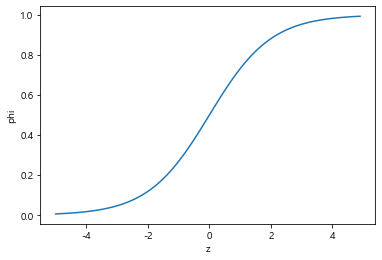

In [52]:
z = np.arange(-5 , 5 , 0.1)
# print(z)

phi = 1 / (1 + np.exp(-z))
# print(phi)

plt.plot(z , phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()
plt.close()

# 아래의 선형방정식을 사용하여 z값을 기준으로 0보다 크면 모두 1로 반환 0보다 작으면 모두 0으로 반환한다.

In [82]:
bream_smelt_train_idx = (y_train== 'Bream') | (y_train == 'Smelt')

X_train_scaler_bream_smelt = X_train_scaler[bream_smelt_idx]
y_train_bream_smelt = y_train[bream_smelt_idx]


print()


bream_smelt_test_idx = (y_test== 'Bream') | (y_test == 'Smelt')
X_train_scaler_bream_smelt = X_train_scaler[bream_smelt_idx]

X_train_scaler_bream_smelt = X_train_scaler[bream_smelt_idx]
y_train_bream_smelt = y_train[bream_smelt_idx]

print()
print()

X_test_scaler_bream_smelt = X_test_scaler[bream_smelt_test_idx]
y_test_bream_smelt = y_test[bream_smelt_test_idx]


In [83]:
print('이진확률 분류 - ')
logist_model = LogisticRegression()
logist_model.fit(X_train_scaler_bream_smelt , y_train_bream_smelt)

y_predict = logist_model.predict(X_test_scaler_bream_smelt)
print(y_predict)
print('결과를 로지스틱 회귀 확률로 확인')
print(logist_model.predict_proba(X_test_scaler_bream_smelt))

이진확률 분류 - 
['Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt']
결과를 로지스틱 회귀 확률로 확인
[[0.00926313 0.99073687]
 [0.99761745 0.00238255]
 [0.94858156 0.05141844]
 [0.97727126 0.02272874]
 [0.9459641  0.0540359 ]
 [0.84045389 0.15954611]
 [0.98791573 0.01208427]
 [0.97550998 0.02449002]
 [0.0074457  0.9925543 ]]


In [85]:
logist_model.classes_

array(['Bream', 'Smelt'], dtype=object)

- logistic regression 이진분류지만 다중분류가 가능하다
- logistic regression 기본적으로 릿지회귀와 같이 계수의 제곱규제(L2 규제)
- logistic regression 규제를 제어하므로 타겟의 수를 늘린다(7개)

In [97]:
print('로지스틱을 이용한 다중분류 - ')

# LogisticRegression(C = ) 규제를 하겠다.

logist_model = LogisticRegression(C = 7 , max_iter = 1000)
logist_model.fit(X_train_scaler , y_train)
logist_model.predict(X_test_scaler)

print('model predict - ' , y_predict)
print()
print('X_test - answer ' , y_test[:10])
print()
print()
logist_model_proba = logist_model.predict_proba(X_test_scaler)
print('확률 - ')
print(logist_model.classes_)
print(np.round(logist_model_proba[:10],3))

로지스틱을 이용한 다중분류 - 
model predict -  ['Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt']

X_test - answer  ['Smelt' 'Bream' 'Pike' 'Perch' 'Perch' 'Bream' 'Roach' 'Pike' 'Perch'
 'Roach']


확률 - 
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.    0.013 0.    0.001 0.986 0.   ]
 [0.998 0.002 0.    0.    0.    0.    0.001]
 [0.    0.    0.01  0.99  0.    0.    0.   ]
 [0.    0.033 0.756 0.    0.135 0.072 0.004]
 [0.072 0.001 0.601 0.005 0.019 0.    0.303]
 [0.678 0.316 0.    0.    0.002 0.    0.004]
 [0.001 0.108 0.236 0.004 0.59  0.038 0.022]
 [0.    0.    0.017 0.978 0.005 0.    0.001]
 [0.    0.022 0.668 0.001 0.24  0.061 0.007]
 [0.    0.093 0.287 0.    0.216 0.4   0.003]]


- 지도학습의 회귀이란 ?
- 타겟 중 하나로 분류하는 것이 아니라 임의의 어떠한 숫자를 예측하는 문제
- ex) 키 , 몸무게 , 경제 성장률 , 배달 도착시간
- 회귀란 정해진 타겟이 없고 임의의 수치를 출력하는 것이다.
- 종속변수에 영향을 미치는 독립변수와의 관계를 파악하기 위해서는 상관분석이 필요하다.
    - 상관계수가 1에 가깝다면 영향력이 크다.
-  용어정라
    - 독립변수 (target)
    - 종속변수 (feature)
    - 독립변수는 종속변수에 영양을 끼친다.
- 회귀 : 독립변수를 찾는 일 단, 숫자여야함
- 회귀는 독립변수가 종속변수에 어떤 영향을 미치는지를 알아보는 분석방법

In [99]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


데이터가 어떤 형태를 띄고 있는 지 시각화 -
perch -> 농어


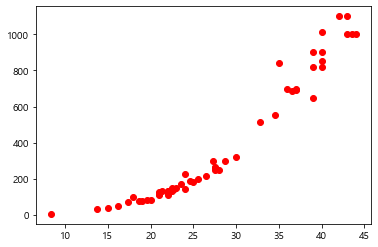

농어의 길이가 길수록 농어의 무게가 증가한다.


In [104]:
print('데이터가 어떤 형태를 띄고 있는 지 시각화 -')
print('perch -> 농어')
plt.scatter(perch_length , perch_weight , color = 'red')
plt.show()
plt.close()

print('농어의 길이가 길수록 농어의 무게가 증가한다.')

In [107]:
# 1 데이터 분리


print('데이터 분리 - ')
print('학습에 필요한 데이터셋은 2차원 배열이어야한다. - reshape')
print('농어의 무게를 예측하려고 한다. 그런데 무게에 영향을 미치는 요소는 길이가 된다.')
X_train , X_test , y_train , y_test = train_test_split ( perch_length
                                                       , perch_weight
                                                        # 테스트 데이터의 비율 20퍼센트
                                                       , test_size = 0.2
                                                        # 데이터 셔플
                                                       , shuffle   = True
                                                       , random_state = 200)
print('shqpe - ' , X_train.shape , X_test.shape , y_train.shape , y_test.shape)

데이터 분리 - 
학습에 필요한 데이터셋은 2차원 배열이어야한다. - reshape
농어의 무게를 예측하려고 한다. 그런데 무게에 영향을 미치는 요소는 길이가 된다.
shqpe -  (44,) (12,) (44,) (12,)


In [108]:
X_train = X_train.reshape(-1 ,1)
X_test  = X_test.reshape(-1 , 1)

In [109]:
print('shqpe - ' , X_train.shape , X_test.shape , y_train.shape , y_test.shape)

shqpe -  (44, 1) (12, 1) (44,) (12,)


In [180]:
# 분류방식 설정
# 오차 구하기

knn_regression_model = KNeighborsRegressor()
knn_regression_model.fit(X_train , y_train)
y_predict = knn_regression_model.predict(X_test)
print()


mse = mean_squared_error(y_test , y_predict)
mae = mean_absolute_error(y_test , y_predict)
rmse = np.sqrt(mean_squared_error(y_test , y_predict))

print('mse - 모델이 예측값과 실제값 차이의 면적을 제곱한 합이다. (작을수록 성능이 뛰어나다.)')
print('특이값에 민감한 특징을 가진다.')
print('mse - ' , mse)
print()
print('mae -  모델이 예측값과 실제값  차이의 절댓값의 평균' )
print('가장 직관적인 지표')
print('mae - ' , mae)
print()
print('rmse - mse에 루트를 씌운 것')
print('rmse 사용하면 오류지표가 실제값과 유사한 단위로 다시 변환되어 해석이 용이하다.')
print('rmse - ' , rmse)


# rmse를 0에 가깝게 만들어가는 과정


mse - 모델이 예측값과 실제값 차이의 면적을 제곱한 합이다. (작을수록 성능이 뛰어나다.)
특이값에 민감한 특징을 가진다.
mse -  11274.808333333334

mae -  모델이 예측값과 실제값  차이의 절댓값의 평균
가장 직관적인 지표
mae -  76.78333333333333

rmse - mse에 루트를 씌운 것
rmse 사용하면 오류지표가 실제값과 유사한 단위로 다시 변환되어 해석이 용이하다.
rmse -  106.18290038105634


In [123]:
print('train - score : ' , knn_regression_model.score(X_train , y_train))
print('test  - score : ' , knn_regression_model.score(X_test , y_test))


train - score :  0.9883720473430138
test  - score :  0.9002306544743127


- 회귀는 평가지표로 분류 모델의 평가지표가 아닌 절댓값의 오차 평균을 측정도구로 사용한다.
- 회귀란 기울기와 절편의 값을 학습을 통해서 조정해나가는 방식으로 오차를 줄이는 것이다.
- y = (w * x) + bias

In [147]:
print('answer - ' , y_test[0])
print('guess  - ' , y_predict[0])
print()

answer -  900.0
guess  -  855.0



In [170]:
LinearRegression()

LinearRegression()

In [160]:
linear_regression_model_02 = LinearRegression()
linear_regression_model_02.fit(X_train , y_train)
y_predict = linear_regression_model_02.predict(X_test)
print('answer - ' , y_test[0])
print('guess  - ' , y_predict[0])
print()

answer -  900.0
guess  -  806.9919552336835



In [163]:
print('w 기울기 - ' , linear_regression_model_02.coef_)
print('b 절편   - ' , linear_regression_model_02.intercept_)

w 기울기 -  [37.84675191]
b 절편   -  -669.0313691755775


In [165]:
(37.84675191 * 900) + -669.0313691755775

33393.045349824424

In [187]:
# X_test[0] -> 농어의 길이
# 출력 -> 농어의 무게

y = (linear_regression_model_02.coef_ * X_test[0]) + linear_regression_model_02.intercept_
y

array([806.99195523])

In [168]:
X_test[0]

array([39.])

### R-squared(결정계수)

In [173]:
print('R - ' , linear_regression_model_02.score(X_train , y_train))
print('R - ' , linear_regression_model_02.score(X_test , y_test))

R -  0.9126564383945558
R -  0.919455876933636


선형회귀 시각화


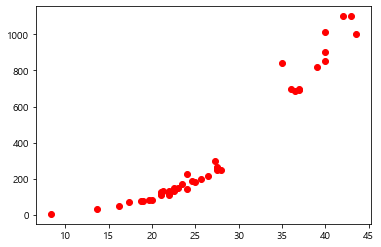

In [178]:
print('선형회귀 시각화')

plt.scatter(X_train , y_train , color = 'red')
plt.show()
plt.close()


선형회귀 - 독립변수가 하나인 경우 어떤 직선을 학습하는 알고리즘
선형회귀 시각화


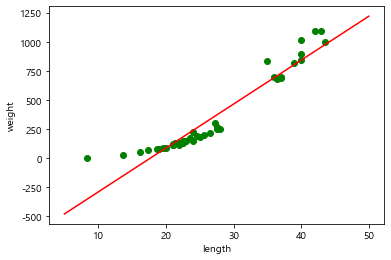

In [191]:
print('선형회귀 - 독립변수가 하나인 경우 어떤 직선을 학습하는 알고리즘')
print('선형회귀 시각화')

plt.scatter(X_train , y_train , color = 'green')
plt.plot([5,50] , [(linear_regression_model_02.coef_ * 5) + linear_regression_model_02.intercept_ 
                   , (linear_regression_model_02.coef_ * 50) + linear_regression_model_02.intercept_] 
         , color = 'red')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()
plt.close()



선형회귀 - 독립변수가 하나인 경우 어떤 직선을 학습하는 알고리즘
선형회귀 시각화


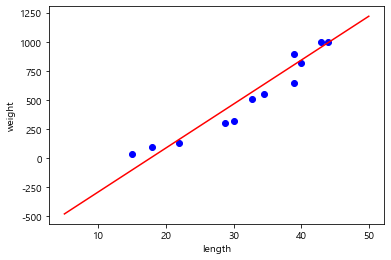

In [190]:
print('선형회귀 - 독립변수가 하나인 경우 어떤 직선을 학습하는 알고리즘')
print('선형회귀 시각화')

plt.scatter(X_test , y_test , color = 'blue')
plt.plot([5,50] , [(linear_regression_model_02.coef_ * 5) + linear_regression_model_02.intercept_ 
                   , (linear_regression_model_02.coef_ * 50) + linear_regression_model_02.intercept_] 
         , color = 'red')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()
plt.close()



In [195]:
print('최적의 직선을 찾기보다 최적의 곡선을 찾으면 어떨까')
print('곡선을 만들려면 2차 방정식 - 길이를 제곱한 훈련세트가 필요하다.')
print('다항 회귀 - ploy ')

X_train_poly = np.column_stack((X_train ** 2 , X_train))
X_test_poly = np.column_stack((X_test ** 2 , X_test))


최적의 직선을 찾기보다 최적의 곡선을 찾으면 어떨까
곡선을 만들려면 2차 방정식 - 길이를 제곱한 훈련세트가 필요하다.
다항 회귀 - ploy 


In [197]:
X_train_poly.shape , X_test_poly.shape

((44, 2), (12, 2))

In [202]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly , y_train)
poly_predict = poly_model.predict(X_test_poly)


In [203]:
poly_predict

array([ 840.6273344 ,  840.6273344 ,  590.34921893,  507.42047929,
       1171.0847751 ,  902.30866289,   54.69287444,   21.79939656,
       1100.58312732,  129.42196244,  333.634271  ,  384.72396982])

In [205]:
print('다항(polynomial) - y = (w1 * x1) * (w2 * x2 )+ b')
print('w = 기울기 - ' , poly_model.coef_)
print()
print('b = 절편   - ' , poly_model.intercept_)

다항(polynomial) - y = (w1 + x1) * (w2 * x2 )+ b
w = 기울기 -  [  1.10253991 -25.41932441]

b = 절편   -  155.01778290544837


In [207]:
print('길이가 50인 무게를 예측한다면')
poly_model.predict([[50 **2 , 50]])

길이가 50인 무게를 예측한다면


array([1640.40133802])

선형회귀 - 독립변수가 하나 "이상"인 경우 어떤 직선을 학습하는 알고리즘
선형회귀 시각화


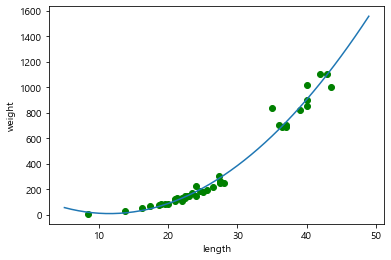

In [218]:
print('선형회귀 - 독립변수가 하나 "이상"인 경우 어떤 직선을 학습하는 알고리즘')
print('선형회귀 시각화')

point = np.arange(5,50)

plt.scatter(X_train , y_train , color = 'green')
plt.plot(point , 1.10253991*(point**2) - 25.41932441*point + 155.01778290544837)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()
plt.close()



In [220]:
# 결정계수

print('R - ' , poly_model.score(X_train_poly , y_train))
print('R - ' , poly_model.score(X_test_poly , y_test))

R -  0.9782244268643111
R -  0.9299579980020948


In [221]:
point

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [212]:
[25,2500]*2

[25, 2500, 25, 2500]

In [224]:
X_train

array([[25.6],
       [40. ],
       [19.6],
       [27.5],
       [27.5],
       [27.3],
       [35. ],
       [22. ],
       [28. ],
       [26.5],
       [ 8.4],
       [22.5],
       [16.2],
       [37. ],
       [21. ],
       [22.5],
       [43. ],
       [21.3],
       [27.5],
       [23. ],
       [36.5],
       [24. ],
       [22.7],
       [23.5],
       [43.5],
       [40. ],
       [20. ],
       [39. ],
       [19. ],
       [13.7],
       [42. ],
       [18.7],
       [21. ],
       [40. ],
       [25. ],
       [22. ],
       [24. ],
       [22. ],
       [21. ],
       [37. ],
       [17.4],
       [22. ],
       [36. ],
       [24.6]])

In [223]:
X_train_poly = np.column_stack((X_train ** 2 , X_train))
X_train_poly

array([[ 655.36,   25.6 ],
       [1600.  ,   40.  ],
       [ 384.16,   19.6 ],
       [ 756.25,   27.5 ],
       [ 756.25,   27.5 ],
       [ 745.29,   27.3 ],
       [1225.  ,   35.  ],
       [ 484.  ,   22.  ],
       [ 784.  ,   28.  ],
       [ 702.25,   26.5 ],
       [  70.56,    8.4 ],
       [ 506.25,   22.5 ],
       [ 262.44,   16.2 ],
       [1369.  ,   37.  ],
       [ 441.  ,   21.  ],
       [ 506.25,   22.5 ],
       [1849.  ,   43.  ],
       [ 453.69,   21.3 ],
       [ 756.25,   27.5 ],
       [ 529.  ,   23.  ],
       [1332.25,   36.5 ],
       [ 576.  ,   24.  ],
       [ 515.29,   22.7 ],
       [ 552.25,   23.5 ],
       [1892.25,   43.5 ],
       [1600.  ,   40.  ],
       [ 400.  ,   20.  ],
       [1521.  ,   39.  ],
       [ 361.  ,   19.  ],
       [ 187.69,   13.7 ],
       [1764.  ,   42.  ],
       [ 349.69,   18.7 ],
       [ 441.  ,   21.  ],
       [1600.  ,   40.  ],
       [ 625.  ,   25.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
 